In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [120]:
data=pd.read_csv('winequality.csv')

In [121]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [123]:
data['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [124]:
data['type']=data['type'].map({'red':0,'white':1})

In [125]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [126]:
data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [127]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [128]:
data.fillna(data.mean(),inplace=True)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [130]:
data['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [131]:
data['quality']=data['quality'].apply(lambda x:1 if x>5 else 0)

In [132]:
data['quality'].value_counts()

quality
1    4113
0    2384
Name: count, dtype: int64

In [133]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


(6497, 13)

In [134]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [135]:
data=data.astype(int)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   type                  6497 non-null   int64
 1   fixed acidity         6497 non-null   int64
 2   volatile acidity      6497 non-null   int64
 3   citric acid           6497 non-null   int64
 4   residual sugar        6497 non-null   int64
 5   chlorides             6497 non-null   int64
 6   free sulfur dioxide   6497 non-null   int64
 7   total sulfur dioxide  6497 non-null   int64
 8   density               6497 non-null   int64
 9   pH                    6497 non-null   int64
 10  sulphates             6497 non-null   int64
 11  alcohol               6497 non-null   int64
 12  quality               6497 non-null   int64
dtypes: int64(13)
memory usage: 660.0 KB


<Axes: >

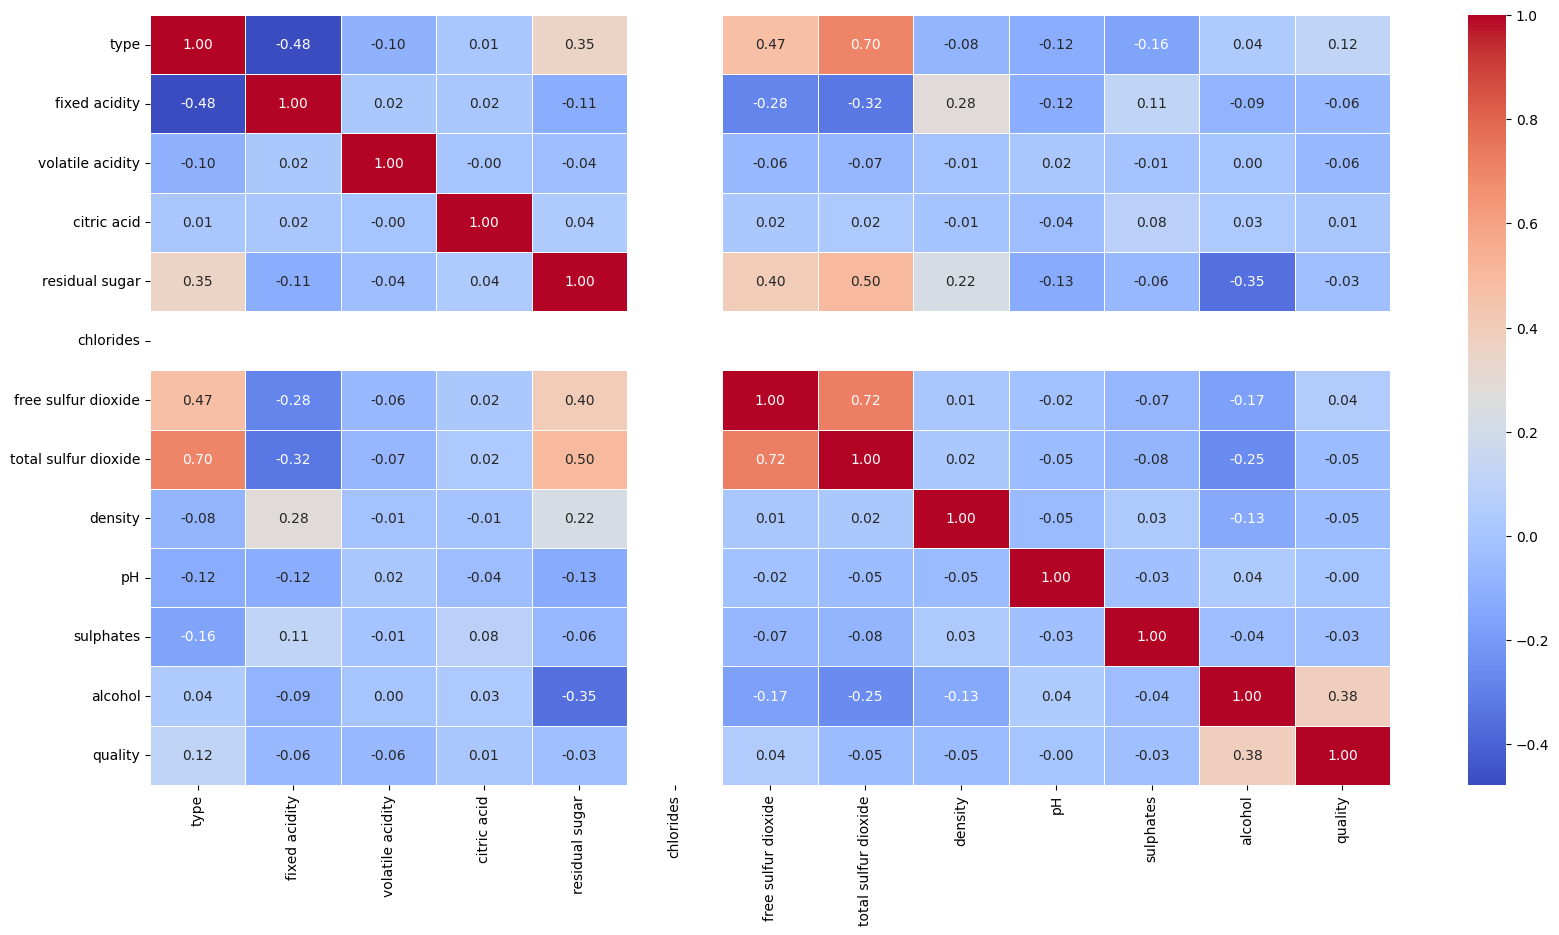

In [137]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)

In [138]:
x=data.drop('quality',axis=1)
y=data['quality']

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
model=KNeighborsClassifier(n_neighbors=5)

In [141]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [142]:
y_pred=model.predict(x_test)

In [143]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [144]:
accuracy=accuracy_score(y_test,y_pred)

In [145]:
accuracy

0.6784615384615384

In [146]:
model2=LogisticRegression()

In [147]:
model2.fit(x_train,y_train)

LogisticRegression()

In [148]:
y_pred=model2.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [149]:
accuracy=accuracy_score(y_test,y_pred)

In [150]:
accuracy

0.6823076923076923

In [151]:
rfc=RandomForestClassifier()

In [152]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [153]:
y_pred=rfc.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [154]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.806923076923077


In [155]:
dtc=DecisionTreeClassifier()

In [156]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [157]:
y_pred=dtc.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [158]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7638461538461538


In [166]:
model5=Sequential()

model5.add(Dense(64,activation='relu'))
model5.add(Dense(32,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

In [167]:
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [168]:
history=model5.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
130/130 [==============================] - 2s 7ms/step - loss: 1.5097 - accuracy: 0.5574 - val_loss: 0.6722 - val_accuracy: 0.6548
Epoch 2/100
130/130 [==============================] - 1s 6ms/step - loss: 0.6653 - accuracy: 0.6247 - val_loss: 0.7930 - val_accuracy: 0.6519
Epoch 3/100
130/130 [==============================] - 1s 6ms/step - loss: 0.6445 - accuracy: 0.6392 - val_loss: 0.6211 - val_accuracy: 0.6577
Epoch 4/100
130/130 [==============================] - 1s 4ms/step - loss: 0.6269 - accuracy: 0.6447 - val_loss: 0.7740 - val_accuracy: 0.5327
Epoch 5/100
130/130 [==============================] - 0s 4ms/step - loss: 0.6277 - accuracy: 0.6485 - val_loss: 0.6137 - val_accuracy: 0.6500
Epoch 6/100
130/130 [==============================] - 1s 4ms/step - loss: 0.6170 - accuracy: 0.6594 - val_loss: 0.6123 - val_accuracy: 0.6538
Epoch 7/100
130/130 [==============================] - 0s 4ms/step - loss: 0.6306 - accuracy: 0.6440 - val_loss: 0.6946 - val_accuracy: 0.6231

In [169]:
y_pred=model5.predict(x_test)

41/41 [==============================] - 0s 2ms/step


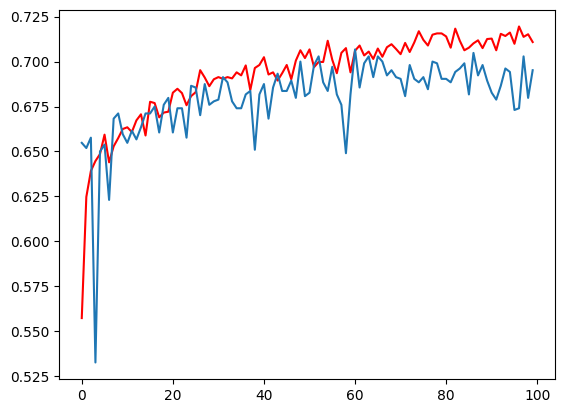

In [170]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])

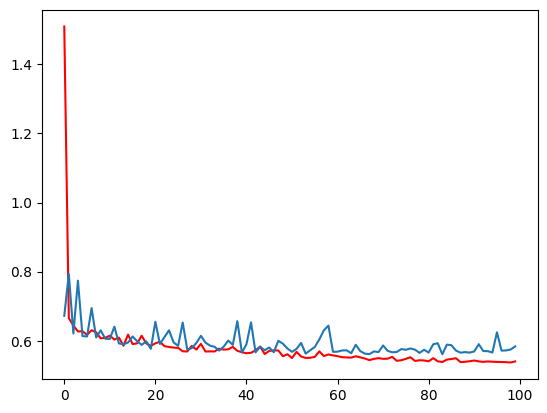

In [171]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'])